In [4]:
import numpy as np
import pandas as pd
pd.options.display.float_format='{: .2f}'.format
from __future__ import division

path='C:\Users\Pavel_2\Desktop\Hedge\\'
txtTiker='XAU_60'

df=pd.read_table(path+txtTiker+'.txt',sep=',',names=['Date','Time','Open','High','Low','Close','Volume'])
# если не указать header=None то первая строка будет принята как header
del df['Volume']
# данные были взяты в российском поясе времени, потому существуют последствия перевода времени.
# на 240мин барах иногда нет времени 2200 потому нельзя объединить две таблицы данных одним merge

print df[df['Time']==2300][:5]
print
print df[df['Time']==2000][:5]

           Date  Time    Open    High     Low   Close
13   01/01/2008  2300  833.70  833.70  833.70  833.70
35   02/01/2008  2300  856.75  858.50  856.65  858.25
59   03/01/2008  2300  862.35  865.70  861.80  865.20
83   04/01/2008  2300  860.30  861.25  859.90  861.15
106  07/01/2008  2300  858.10  858.10  857.30  858.00

           Date  Time    Open    High     Low   Close
12   01/01/2008  2000  833.70  833.70  833.70  833.70
32   02/01/2008  2000  857.97  861.35  856.30  856.75
56   03/01/2008  2000  868.02  868.55  863.20  866.05
80   04/01/2008  2000  863.02  864.10  861.60  863.20
103  07/01/2008  2000  860.45  861.20  859.55  859.95


In [6]:
txtTest='XAU_Test8L_240_2016'
test=pd.read_table(path+txtTest+'.txt',sep=',')
print test[test['Time']==2300][:5]
print
print test[test['Time']==2200][:5]
print
print test[test['Time']==2100][:5]

          Date  Time   Type  Cnts   Price Signal_Name
3   12/02/2008  2300  LExit   991  904.70          EL
7   18/03/2008  2300  LExit  1005  981.40          EL
10  05/05/2008  2300    Buy  1144  874.10          OL
18  10/07/2008  2300    Buy   884  947.70          OL
19  16/07/2008  2300  LExit   884  958.72          EL

Empty DataFrame
Columns: [Date, Time, Type, Cnts, Price, Signal_Name]
Index: []

Empty DataFrame
Columns: [Date, Time, Type, Cnts, Price, Signal_Name]
Index: []


In [7]:
Time_R=test.Time.replace(2300,2000) # 'NI_Test5L_240
del test['Time']
test['Time']=Time_R
names=['Date','Time','Type','Cnts','Price','Signal_Name']
# меняем порядок следования столбцов
test=test.reindex(columns=names)

# замена актуальна для таймфрейма 120/240 минут
#test.loc[367,'Time']=2100
#test.loc[371,'Time']=2100
#test.loc[374,'Time']=2100

In [8]:
merge_df=pd.merge(df,test,on=['Date','Time'],how='outer') 
merge_df.fillna(0,inplace=True)
merge_df[-10:]
# внимание на последние строки
# merge_df.to_csv(path_or_buf='NI_240_obr.txt', sep=',')

,Date,Time,Open,High,Low,Close,Type,Cnts,Price,Signal_Name
55086,08/12/2016,300,1175.08,1176.35,1174.38,1174.95,0,0.00,0.00,0
55087,08/12/2016,400,1174.95,1176.96,1174.86,1176.34,0,0.00,0.00,0
55088,08/12/2016,500,1176.34,1177.88,1176.03,1177.33,0,0.00,0.00,0
55089,08/12/2016,600,1177.33,1178.79,1177.08,1178.10,0,0.00,0.00,0
55090,08/12/2016,700,1178.10,1178.37,1176.67,1176.88,0,0.00,0.00,0
55091,08/12/2016,800,1176.88,1178.42,1175.89,1176.94,0,0.00,0.00,0
55092,08/12/2016,900,1176.95,1177.36,1175.97,1176.07,0,0.00,0.00,0
55093,08/12/2016,1000,1176.07,1176.82,1173.97,1175.65,0,0.00,0.00,0
55094,08/12/2016,1100,1175.65,1177.17,1173.90,1176.27,0,0.00,0.00,0
55095,08/12/2016,1200,1176.27,1176.78,1175.58,1175.77,0,0.00,0.00,0


In [9]:
# в  Python если итерироваться по объекту (DataFrame,  Serios) то этот обэект нельзя менять
# а нам нужно дописать новые столбцы в DataFrame данные из которых будут расчитаны исходя их данных текущих столбцов
# я нашел два способа решать это
# 1 выделить отдельный объкт по нему проходить получая (допустим) номер строки  DataFrame
# 2 итерировать сам объект DataFrame записывая новые данные в другой объеект, а потом мерджить два объекта

Index2=[0 for _ in xrange(len(merge_df))]
#print Index2, len(Index2)

# 2 вариант быстрее
PozList=[]
POZ=0 # начальное значение позиции
for i,row in merge_df.iterrows():    
    if row['Signal_Name']=='EL' or row['Signal_Name']=='ELS':
        POZ=0
    if row['Signal_Name']=='OL' or POZ==1:
        PozList.append(1)
        POZ=1        
    else:
        PozList.append(0)   
# print PozList[:150]  

merge_df['Pozition']=PozList
merge_df[merge_df['Signal_Name']<>0][:10]

,Date,Time,Open,High,Low,Close,Type,Cnts,Price,Signal_Name,Pozition
31,02/01/2008,1900,853.27,859.60,853.25,857.97,Buy,1165.00,857.97,OL,1
555,01/02/2008,1900,905.45,913.10,905.40,910.45,LExit,1165.00,910.45,EL,0
626,06/02/2008,1900,905.15,907.47,901.85,906.02,Buy,991.00,906.02,OL,1
722,12/02/2008,2000,911.30,911.30,904.20,906.22,LExit,991.00,904.70,EL,0
840,19/02/2008,1900,928.50,930.75,927.30,928.21,Buy,999.00,928.21,OL,1
1078,04/03/2008,1900,981.80,982.55,961.35,965.52,LExit,999.00,965.52,EL,0
1243,13/03/2008,1500,996.10,997.75,993.46,994.90,Buy,1005.00,994.90,OL,1
1320,18/03/2008,2000,1001.57,1004.70,1000.82,1003.90,LExit,1005.00,981.40,EL,0
1591,03/04/2008,1900,903.15,908.95,902.50,907.75,Buy,984.00,907.75,OL,1
1850,18/04/2008,1500,934.50,935.95,922.50,923.00,LExit,984.00,923.00,EL,0


In [10]:
# avg_df=merge_df  так просто присваивается ссылка и последующие изменения в avg_df будут отражаться! в merge_df

avg_df_copy=merge_df[merge_df['Time']==2000].copy() # ==2000 делает на одной сделке запаздывание поскольку
# сигнал приходит в 2100 а мы его будем учитывать только на следующтй день поскольку удаляем бары с временем 2100
# 01/03/2016	2100	Buy	115	8675.0	OL

# DataFrame(avg_df) выдаст ошибку - DataFrame constructor not properly called!
# DataFrame constructor Parameters :
# data : numpy ndarray (structured or homogeneous), dict, or DataFrame Dict can contain Series, arrays, constants, or list-like objects

# нужно привести сначала в np.array и потом снова в DataFrame  
avg_df_copy=np.array(avg_df_copy)

from pandas import Series, DataFrame # name 'DataFrame' is not defined
avg_df_copy=DataFrame(avg_df_copy,columns=merge_df.columns)
avg_df_copy.drop(avg_df_copy.columns[[2,3,4,6,7,8,9]],axis=1,inplace=True)

avg_df_copy.index=pd.to_datetime(avg_df_copy.Date,dayfirst=True)
avg_df_copy['Year']=avg_df_copy.index.year
avg_df_copy['Month']=avg_df_copy.index.month
#del avg_df_copy['Date']

names=['Year','Month','Time','Close','Pozition']
avg_df_copy=avg_df_copy.reindex(columns=names)
avg_df_copy["Close"]=avg_df_copy["Close"].astype(float)
avg_df=avg_df_copy.copy()
avg_df[:15]

,Year,Month,Time,Close,Pozition
Date,,,,,
2008-01-01,2008,1,2000,833.70,0
2008-01-02,2008,1,2000,856.75,1
2008-01-03,2008,1,2000,866.05,1
2008-01-04,2008,1,2000,863.20,1
2008-01-07,2008,1,2000,859.95,1
2008-01-08,2008,1,2000,878.75,1
2008-01-09,2008,1,2000,879.90,1
2008-01-10,2008,1,2000,891.15,1
2008-01-11,2008,1,2000,896.65,1


In [11]:
 avg_df.to_csv(path_or_buf=path+'XAU_240_LANTA.txt', sep=',')

In [7]:
periodLong=[1,2,3,4,5,6,7,8,9,10]
names_columns=[]
#deals_avg=0
avg_df['Year_prev']=avg_df['Year'].shift(1)

for n in range(len(periodLong)):
    _periodLong=periodLong[n] # 5
    Deals_avg=[]
    counter=0
    for i,row in avg_df.iterrows():   
        rowPozition=row['Pozition']
        valueClose=row['Close']
        if row['Year_prev']<>row['Year']: # avg_df['Year_prev']<>avg_df['Year'] некорректно
            counter=0   # c нового года новая средняя 
        
        if rowPozition==1:
            counter+=1
        else: counter=0  # сбрасываем счетчик
        # записываем цену в рамках периода усреднения в list    
        deals_avg=np.nan
        if counter>=_periodLong:
            deals_avg=valueClose #=1           
        Deals_avg.append(deals_avg)
        
    my_names_columns=str(_periodLong)+'_Max' # задаем название столбцу    
    avg_df[my_names_columns]=Deals_avg
    names_columns.append(my_names_columns)
    
names_columns.insert(0,'Close') # добавляем название столбца 'Close' в список столбцов 
avg_group=avg_df.groupby(avg_df['Year'])[names_columns].mean()
# расчет количества дней когда делается продажа ждя хеджирования
avg_group_count=avg_df.groupby(avg_df['Year'])[names_columns].count()
# делаем процентные изменения
new_names_columns=[]
for names_columns_ in names_columns:
    avg_group['% '+names_columns_]=(avg_group[names_columns_]-avg_group['Close'])*100/avg_group['Close']
    new_names_columns.append('% '+names_columns_)
new_names_columns.pop(0) # удаляем 'Close'
avg_group=avg_group.reindex(columns=new_names_columns)  
avg_group 

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max,% 8_Max,% 9_Max,% 10_Max
Year,,,,,,,,,,
2008,1.25,1.67,1.94,2.02,2.20,2.46,2.57,2.56,2.76,2.91
2009,1.03,1.45,1.78,2.04,2.30,2.55,2.87,3.18,3.41,3.70
2010,0.30,0.42,0.53,0.66,0.66,0.73,1.00,1.29,1.54,1.79
2011,0.77,0.81,0.75,0.63,0.45,0.21,-0.03,-0.27,-0.43,-0.63
2012,0.56,0.66,0.76,0.83,0.94,1.09,1.27,1.46,1.60,1.77
2013,-0.15,0.31,0.89,1.71,2.53,3.47,4.44,5.35,6.25,7.44
2014,1.06,1.15,1.26,1.37,1.51,1.60,1.62,1.63,1.67,1.74
2015,1.87,1.93,1.99,2.03,2.09,2.18,2.34,2.55,2.79,3.03
2016,0.38,0.46,0.58,0.76,0.96,0.99,1.02,1.01,1.09,1.16


In [8]:
DataFrame(avg_group.sum()).T

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max,% 8_Max,% 9_Max,% 10_Max
0,7.07,8.86,10.48,12.05,13.64,15.27,17.09,18.75,20.68,22.90


In [9]:
# по анализу суммарного итога за года выбираем столбцы для расчета средней из столбцов
N=5
avg_N=avg_group.drop(avg_group.columns[N:],axis=1) # N не включается
del avg_N['% 1_Max'] # первые должны быть хуже поскольку с ростом 
del avg_N['% 2_Max'] # N пропускаются убыточные сделки
avg_group['_+N AVG']=avg_N.mean(axis=1)
avg_group

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max,% 8_Max,% 9_Max,% 10_Max,_+N AVG
Year,,,,,,,,,,,
2008,1.25,1.67,1.94,2.02,2.20,2.46,2.57,2.56,2.76,2.91,2.05
2009,1.03,1.45,1.78,2.04,2.30,2.55,2.87,3.18,3.41,3.70,2.04
2010,0.30,0.42,0.53,0.66,0.66,0.73,1.00,1.29,1.54,1.79,0.62
2011,0.77,0.81,0.75,0.63,0.45,0.21,-0.03,-0.27,-0.43,-0.63,0.61
2012,0.56,0.66,0.76,0.83,0.94,1.09,1.27,1.46,1.60,1.77,0.84
2013,-0.15,0.31,0.89,1.71,2.53,3.47,4.44,5.35,6.25,7.44,1.71
2014,1.06,1.15,1.26,1.37,1.51,1.60,1.62,1.63,1.67,1.74,1.38
2015,1.87,1.93,1.99,2.03,2.09,2.18,2.34,2.55,2.79,3.03,2.04
2016,0.38,0.46,0.58,0.76,0.96,0.99,1.02,1.01,1.09,1.16,0.77


In [10]:
#from pandas import ExcelWriter
#writer=ExcelWriter(path+'_ResultHedge.xlsx')
#_startrow=0
#avg_group.to_excel(writer,txtTest,startrow=_startrow)  # txtTest='NI_Test5L_240'
#_startrow+=20
#writer.save() # эта запись только в конце иначе затираются предидущие данные

In [11]:
DataFrame(avg_group.sum()).T

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max,% 8_Max,% 9_Max,% 10_Max,_+N AVG
0,7.07,8.86,10.48,12.05,13.64,15.27,17.09,18.75,20.68,22.90,12.06


In [12]:
#to_writer=DataFrame(avg_group.sum()).T
#to_writer.to_excel(writer,txtTest,startrow=_startrow)
#_startrow+=5

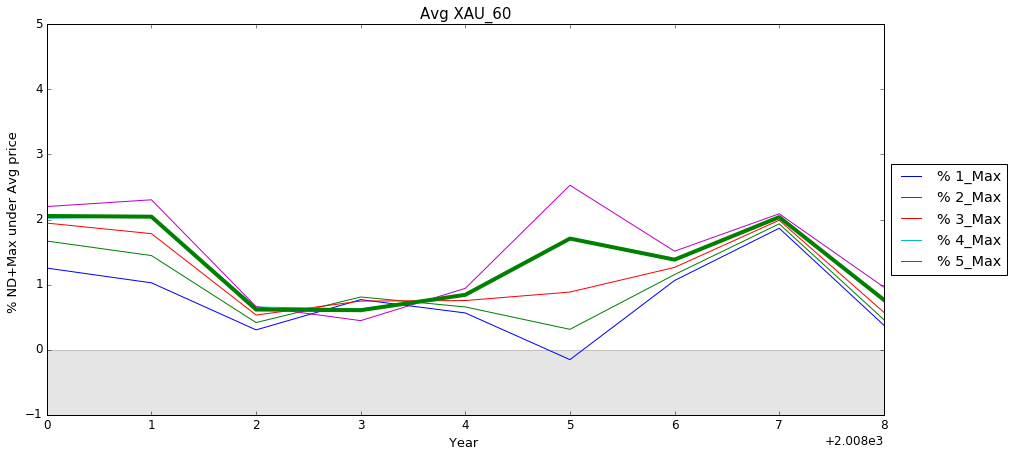

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 7)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 1
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 12
#x=avg_group.index.astype(str)
avg_group.iloc[:,:5].plot(kind='line')
avg_group['_+N AVG'].plot(kind='line',linewidth=4, color='green',legend=True )

plt.ylabel('% ND+Max under Avg price ',fontsize=13)
plt.xlabel('Year ',fontsize=13)
plt.axhline(y=5,linewidth=1, color='grey')
plt.axhspan(0, -1, facecolor='0.5', alpha=0.2)
plt.title("Avg " + txtTiker,fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
#plt.savefig(path+'Avg3_'+txtTest+'.png');

In [42]:
avg_group_describe=avg_group.describe()
avg_group_describe

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,-0.15,-0.11,-0.15,-0.10,-0.06,-0.03,0.01
std,0.58,0.66,0.82,0.88,0.96,1.07,1.14
min,-0.96,-1.20,-1.83,-1.87,-2.08,-2.25,-2.21
25%,-0.40,-0.29,-0.30,-0.28,-0.17,-0.17,-0.18
50%,-0.20,-0.23,-0.18,-0.06,-0.10,-0.12,-0.00
75%,-0.10,0.13,0.10,0.28,0.23,0.52,0.60
max,1.07,1.19,1.27,1.45,1.52,1.69,1.90


In [14]:
#to_writer=avg_group_describe
#to_writer.to_excel(writer,txtTest,startrow=_startrow)
#_startrow+=12

In [15]:
avg_group_count.drop(avg_group_count.index[[0,-1]]) # 0- убираем первую строку 2004 год, -1 - 2016 год

,Close,1_Max,2_Max,3_Max,4_Max,5_Max,6_Max,7_Max,8_Max,9_Max,10_Max
Year,,,,,,,,,,,
2009,248,151,141,133,126,119,112,105,98,92,86
2010,259,136,126,116,106,97,90,84,78,73,68
2011,263,142,132,123,114,105,96,87,79,73,67
2012,259,131,125,119,113,107,101,95,89,84,79
2013,259,107,96,85,74,64,55,47,40,34,28
2014,260,147,140,133,126,119,113,107,101,95,89
2015,260,133,122,111,102,94,86,79,72,65,58


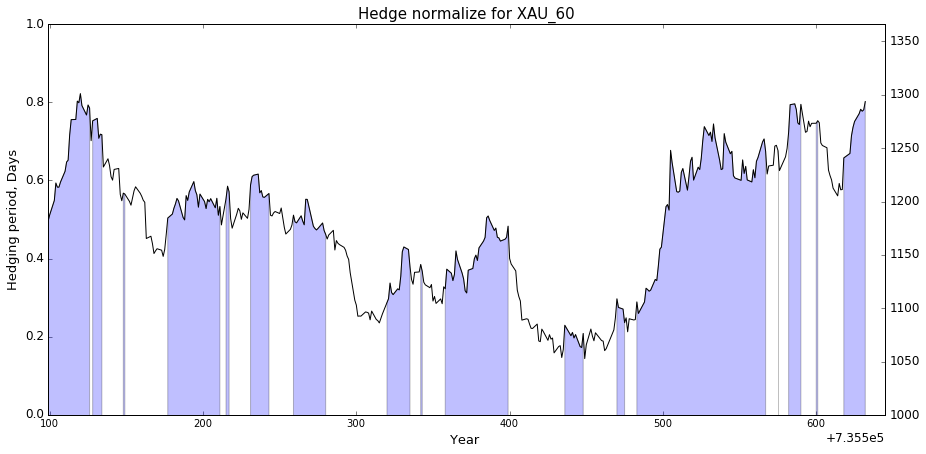

In [18]:
from dateutil.parser import parse
N_days=1
#avg_df[str(N_days)+'_Max'].plot(kind='line')
plt.ylabel('Hedging period, Days',fontsize=13)
plt.xlabel('Year ',fontsize=13)
plt.xticks(fontsize=10,rotation=0) # иначе года показываются через один
plt.title("Hedge normalize for " + txtTiker,fontsize=15)

plt.twinx()
StartData=parse('2015-01-01')
EndData=parse('2016-06-30')
MarketPrice_forGraf=avg_df['Close'][StartData:EndData]
Date_forGraf=MarketPrice_forGraf.index
Date_ind=avg_df.index.slice_locs(start=StartData, end=EndData)

plt.plot(MarketPrice_forGraf,"k-",linewidth=1,alpha=1)
plt.xlim(StartData,EndData); #'2016-06-15'
plt.ylim(0.95*min(MarketPrice_forGraf),1.05*max(MarketPrice_forGraf))
plt.fill_between(Date_forGraf,0, MarketPrice_forGraf, facecolor='blue',where=avg_df[str(N_days)+'_Max'][Date_ind[0]:Date_ind[1]]>0,alpha=0.25)
#plt.savefig(path+'Hedge norm_'+txtTest+'.png');

In [19]:
#drop(avg_group.columns[N:],axis=1)
describe_count=avg_group_count.drop(avg_group_count.index[[0,-1]]).describe()
describe_count
#describe_count.iloc[7,:]

,Close,1_Max,2_Max,3_Max,4_Max,5_Max,6_Max,7_Max,8_Max,9_Max,10_Max
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,258.29,135.29,126.00,117.14,108.71,100.71,93.29,86.29,79.57,73.71,67.86
std,4.75,14.45,15.13,16.40,17.80,18.86,19.73,20.24,20.47,20.61,20.76
min,248.00,107.00,96.00,85.00,74.00,64.00,55.00,47.00,40.00,34.00,28.00
25%,259.00,132.00,123.50,113.50,104.00,95.50,88.00,81.50,75.00,69.00,62.50
50%,259.00,136.00,126.00,119.00,113.00,105.00,96.00,87.00,79.00,73.00,68.00
75%,260.00,144.50,136.00,128.00,120.00,113.00,106.50,100.00,93.50,88.00,82.50
max,263.00,151.00,141.00,133.00,126.00,119.00,113.00,107.00,101.00,95.00,89.00


In [20]:
#to_writer=describe_count
#to_writer.to_excel(writer,txtTest,startrow=_startrow)
#_startrow+=12

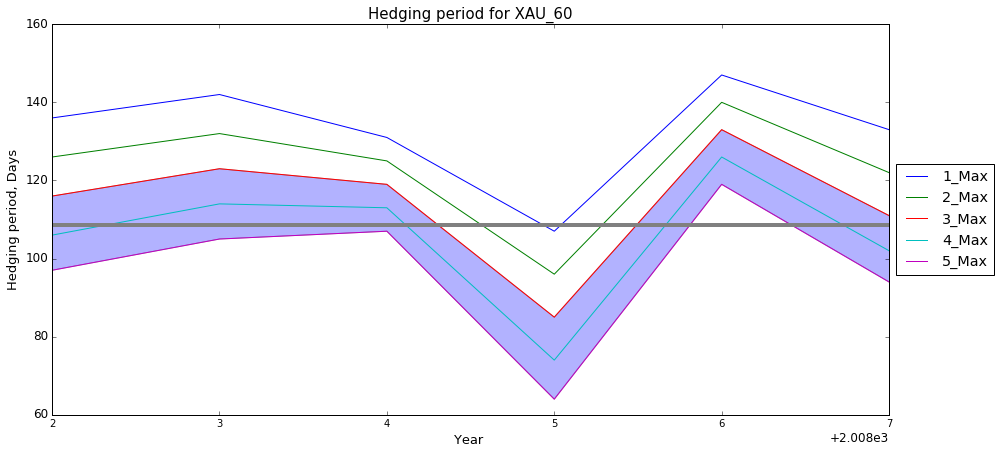

In [21]:
avg_group_count.iloc[:,1:6].plot(kind='line')
plt.ylabel('Hedging period, Days',fontsize=13)
plt.xlabel('Year ',fontsize=13)

mean_line=describe_count.iloc[1,4] # 4_Max mean
plt.axhline(y=mean_line ,linewidth=4, color='grey') # задан средний размер
plt.fill_between(avg_group_count.index.values.tolist(),
                 avg_group_count.iloc[:,5].values.tolist(),avg_group_count.iloc[:,3].values.tolist(), facecolor='blue',alpha=0.30)
plt.title("Hedging period for " + txtTiker,fontsize=15)
plt.xticks(avg_group_count.index.values.tolist(),fontsize=10) # иначе года показываются через один
plt.xlim(2010,2015) # 2004 и 2016 неполные года потому для них некорректно период хеджирования указывать
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig(path+'Hedging period_'+txtTest+'.png');

In [22]:
avg_df['Year_prev']=avg_df['Year'].shift(1)
periodLong=[1,2,3,4,5,6,7,8,9,10]
names_columns=[]
days=0
Days=[]
for i,row in avg_df.iterrows():   
    if row['Year_prev']<>row['Year']: # avg_df['Year_prev']<>avg_df['Year'] некорректно
        days=1
    else: days+=1
    Days.append(days)
avg_df['All days']=Days

for n in range(len(periodLong)):
    _periodLong=periodLong[n] # 5
    Days=[]
    counter=0
    days=0 # обнуляем куммулятивный счетчик 
    for i,row in avg_df.iterrows():   
        rowPozition=row['Pozition']
        valueClose=row['Close']       
        if row['Year_prev']<>row['Year']: # avg_df['Year_prev']<>avg_df['Year'] некорректно
            days=0 # начинаться год должен
            counter=0   # c нового года новая средняя        
        if rowPozition==1:
            counter+=1
        else: counter=0  # сбрасываем счетчик
        # записываем цену в рамках периода усреднения в list    
        # days=np.nan
        if counter>=_periodLong:
            days+=1 #=1 #valueClose          
        Days.append(days)
        
    my_names_columns=str(_periodLong)+'_Max' # задаем название столбцу    
    avg_df[my_names_columns]=Days
    names_columns.append(my_names_columns)

del avg_df['Year_prev']
#avg_df[:10]

In [23]:
#avg_df['1_Max'].cumsum()[:10]

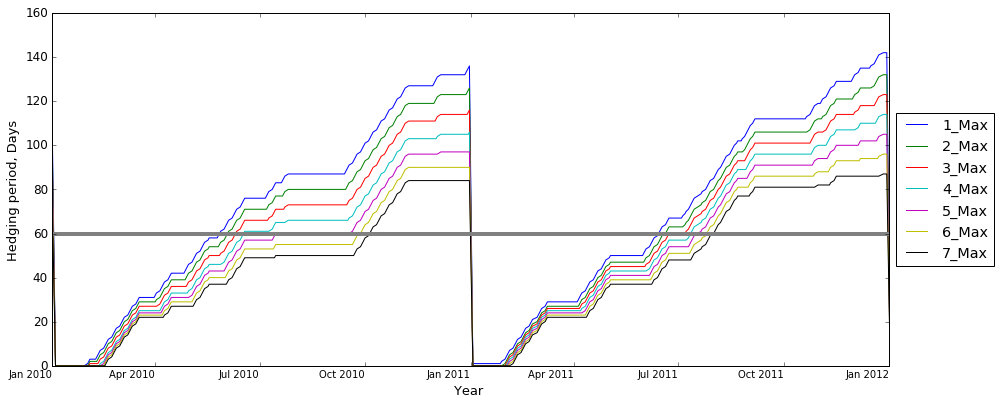

In [24]:
avg_df.iloc[:,5:12].plot(kind='line')
plt.ylabel('Hedging period, Days',fontsize=13)
plt.xlabel('Year ',fontsize=13)
plt.axhline(y=60,linewidth=4, color='grey') # задан средний размер
plt.xticks(fontsize=10,rotation=0) # иначе года показываются через один
plt.xlim('2010-01-01','2012-01-01') #'2016-06-15'
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig(path+'hedge1_'+txtTest+'.png');

In [25]:
new_names_columns=[]
for names_columns_ in names_columns:
    avg_df['% '+names_columns_]=avg_df[names_columns_]/avg_df['All days']
    new_names_columns.append('% '+names_columns_)
#new_names_columns.pop(0) # удаляем 'Close'
avg_df=avg_df.reindex(columns=new_names_columns)  
#avg_df[-10:]  

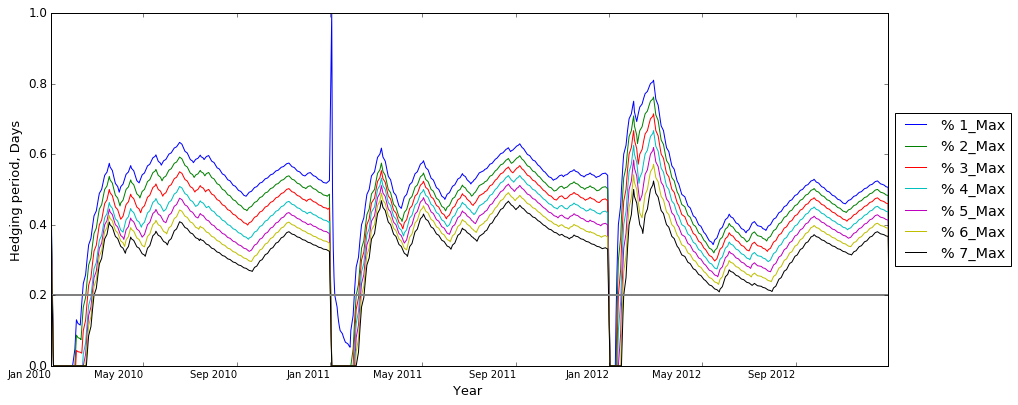

In [26]:
avg_df.iloc[:,0:7].plot(kind='line')
plt.ylabel('Hedging period, Days',fontsize=13)
plt.xlabel('Year ',fontsize=13)
plt.axhline(y=0.20,linewidth=2, color='grey') # задан средний размер
plt.xticks(fontsize=10,rotation=0) # иначе года показываются через один
plt.xlim('2010-01-01','2012-12-31') #'2016-06-15'
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig(path+'hedge2_'+txtTest+'.png');

In [27]:
describe_count.iloc[7,1:8]*1.20 # 1 mean, 7 max

1_Max    181.20
2_Max    169.20
3_Max    159.60
4_Max    151.20
5_Max    142.80
6_Max    135.60
7_Max    128.40
Name: max, dtype: float64

In [28]:
avg_df=avg_df_copy.copy()

avg_df['Year_prev']=avg_df['Year'].shift(1)
#periodLong=[1,2,3,4,5,6,7]
periodLong=[1,2,3,4,5,6,7]
#avgPeriod=[54.00, 45.00, 36.00, 30.00]  # avg_group_count.describe() mean
#avgPeriod=[62.00, 54.00, 46.50, 39.50]  # avg_group_count.describe() 75% 
#avgPeriod=[107.50, 91.50, 75.00, 62.00, 54.00, 46.50, 39.50]  # avg_group_count.describe() 75% 
#avgPeriod=[127.00, 109.00, 93.00, 79.00, 68.00, 58.00, 50.01] # max
avgPeriod=describe_count.iloc[1,1:8]*1 # 1 mean, 7 max
_normalize_days=5 # ограничение для разброса сделок за год в %%

_periodOut=0
names_columns=[]
Deals_avg=[]
Days=[]
DaysLimit=[]
days=0

for i,row in avg_df.iterrows():   
    if row['Year_prev']<>row['Year']: # avg_df['Year_prev']<>avg_df['Year'] некорректно
        days=1  
    else: days+=1
    Days.append(days)
avg_df['All days']=Days

for n in range(len(periodLong)):
    _periodLong=periodLong[n] # 5
    _avgPeriod=avgPeriod[n]
    Deals_avg=[]
    Days=[]
    DaysLimit=[]
    counter=0
    days=0 # обнуляем куммулятивный счетчик
    daysOutLong=0
    for i,row in avg_df.iterrows():   
        rowPozition=row['Pozition']
        valueClose=row['Close']
        AllTradingDays=row['All days']
        my_periodLong=_periodLong
        
        #daysPrev=days # предидущее значение но если был пропуск позиции daysPrev не покажет была ли позиция
        #deals_avg_Prev=deals_avg # deals_avg_Prev<>np.nan вчера закрыли сделку 
        
        if row['Year_prev']<>row['Year']: # avg_df['Year_prev']<>avg_df['Year'] некорректно
            days=0 # начинаться год должен 
            counter=0   # c нового года новая средняя
        
        ratioDays=days/AllTradingDays
        ratioDaysLimit=_avgPeriod/251
        daysLimit=(AllTradingDays/251)*_avgPeriod
        
        #целевым значением количества дней хеджирования принята медиана из результатов статистик
        #if AllTradingDays>=100 and  ratioDays>ratioDaysLimit*1.05:
        #    my_periodLong=_periodLong+1
        #if AllTradingDays>=50 and  ratioDays>ratioDaysLimit*1.10:
        #    my_periodLong=_periodLong+2
        if AllTradingDays>=50 and  days>daysLimit: 
            my_periodLong=_periodLong+(days-daysLimit)    
            
                        
        #if AllTradingDays>=100 and  ratioDays<ratioDaysLimit*0.95:
        #    my_periodLong= max(_periodLong-1,1)   #чтобы не стало отрицательным для _periodLong=1
        #if AllTradingDays>=50 and  ratioDays<ratioDaysLimit*0.90:
        #    my_periodLong= max(_periodLong-2,1)   #чтобы не стало отрицательным для _periodLong=1 
        if days>=_avgPeriod*(1+_normalize_days/100): # ограничение для количества сделок по усреднению СВЕРХУ
            my_periodLong=100       
        
        if rowPozition==1:
            counter+=1
        else: counter=0  
        # от варианта ниже отказался
        #if row['Pozition_prev']<>row['Pozition']:
        #    counter=0  # сбрасываем счетчик
        #if rowPozition==1:
        #    counter+=1
        #else: counter-=1  # делаем счетчик для OutLong 
        
        # записываем цену в рамках периода усреднения в list 
        deals_avg=np.nan               
        
        #if (rowPozition==0 and deals_avg_Prev<>np.nan) and daysLimit>days: # deals_avg_Prev<>np.nan вчера закрыли сделку 
        #    deals_avg=valueClose
        #    days+=1
        if counter>=my_periodLong:
            deals_avg=valueClose #=1  
            days+=1
            daysOutLong=0
        else: daysOutLong+=1
            
        # daysOutLong счетчик дней после выхода из усреднения согласно условию counter>=my_periodLong
        #if (daysOutLong==15 or daysOutLong==30)and daysLimit>days: #  and daysLimit>days
        #    deals_avg=valueClose
        #    days+=1
        
        #avgDaysOutLong=17
        #if (daysOutLong/avgDaysOutLong-daysOutLong//avgDaysOutLong)==0 and daysOutLong<>0: # daysOutLong<> иначе будет задваиваться days
        #    deals_avg=valueClose
        #    days+=1
        
        # ограничение для количества сделок по усреднению СНИЗУ -> _avgPeriod*0.50
        avgDaysOutLong=(255-AllTradingDays)//max((_avgPeriod*(1-_normalize_days/100)-days),1)  # не м.б. меньше единицы иначе в следующей строке ZeroDivisionError
        #print str(255-AllTradingDays)+' // '+str(_avgPeriod-days)
        #265-AllTradingDays должно быть больше нуля иначе потом будет деление на ноль
        avgDaysOutLong=max(avgDaysOutLong,1)
        if (daysOutLong/avgDaysOutLong-daysOutLong//avgDaysOutLong)==0 and daysOutLong<>0 and AllTradingDays>=30 and daysLimit>days: 
            deals_avg=valueClose
            days+=1
        
        Deals_avg.append(deals_avg)        
        Days.append(days) #Days.append(ratioDays)  #Days.append(my_periodLong)
        DaysLimit.append(daysLimit)   #DaysLimit.append(daysLimit)        
         
    my_names_columns=str(_periodLong)+'_Max' # задаем название столбцу    
    names_columns.append(my_names_columns)
    
    avg_df[my_names_columns]=Deals_avg
    avg_df[str(_periodLong)+'_day']=Days
    avg_df[str(_periodLong)+'_lmt']=DaysLimit

names_columns.insert(0,'Close') # добавляем название столбца 'Close' в список столбцов 
avg_group=avg_df.groupby(avg_df['Year'])[names_columns].mean()
# расчет количества дней когда делается продажа ждя хеджирования
avg_group_count=avg_df.groupby(avg_df['Year'])[names_columns].count()

# делаем процентные изменения
new_names_columns=[]
for names_columns_ in names_columns:
    avg_group['% '+names_columns_]=(avg_group[names_columns_]-avg_group['Close'])*100/avg_group['Close']
    new_names_columns.append('% '+names_columns_)
new_names_columns.pop(0) # удаляем 'Close'
avg_group=avg_group.reindex(columns=new_names_columns)  
avg_group 

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max
Year,,,,,,,
2008,-0.15,0.13,0.10,0.28,0.23,0.52,0.61
2009,-0.96,-1.20,-1.83,-1.87,-2.08,-2.25,-2.21
2010,-0.20,-0.27,-0.30,-0.28,-0.17,-0.14,-0.18
2011,-0.65,-0.60,-0.49,-0.58,-0.55,-0.71,-0.94
2012,-0.10,-0.05,-0.06,-0.05,-0.10,-0.12,-0.17
2013,-0.29,-0.23,-0.30,-0.20,-0.11,-0.17,-0.00
2014,0.32,0.38,0.42,0.43,0.52,0.56,0.60
2015,1.07,1.19,1.27,1.45,1.52,1.69,1.90
2016,-0.40,-0.29,-0.18,-0.06,0.17,0.32,0.48


In [29]:
#to_writer=avg_group 
#to_writer.to_excel(writer,txtTest,startrow=_startrow)
#_startrow+=20

In [30]:
DataFrame(avg_group.sum()).T

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max
0,-1.35,-0.96,-1.38,-0.89,-0.57,-0.29,0.08


In [32]:
#to_writer=DataFrame(avg_group.sum()).T
#to_writer.to_excel(writer,txtTest,startrow=_startrow)
#_startrow+=5

In [33]:
# 'этот вариант не запускается он используется чтобы сравнивать с прошлым результатом
DataFrame(avg_group.sum()).T

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max
0,-1.35,-0.96,-1.38,-0.89,-0.57,-0.29,0.08


In [34]:
avg_group_describe=avg_group.describe()
avg_group_describe

,% 1_Max,% 2_Max,% 3_Max,% 4_Max,% 5_Max,% 6_Max,% 7_Max
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,-0.15,-0.11,-0.15,-0.10,-0.06,-0.03,0.01
std,0.58,0.66,0.82,0.88,0.96,1.07,1.14
min,-0.96,-1.20,-1.83,-1.87,-2.08,-2.25,-2.21
25%,-0.40,-0.29,-0.30,-0.28,-0.17,-0.17,-0.18
50%,-0.20,-0.23,-0.18,-0.06,-0.10,-0.12,-0.00
75%,-0.10,0.13,0.10,0.28,0.23,0.52,0.60
max,1.07,1.19,1.27,1.45,1.52,1.69,1.90


In [35]:
#to_writer=avg_group_describe
#to_writer.to_excel(writer,txtTest,startrow=_startrow)
#_startrow+=12

In [36]:
avg_group_count

,Close,1_Max,2_Max,3_Max,4_Max,5_Max,6_Max,7_Max
Year,,,,,,,,
2008,259,143,133,123,115,106,98,90
2009,248,142,133,123,115,106,98,91
2010,259,141,132,123,115,106,98,91
2011,263,143,133,123,115,106,98,91
2012,259,143,133,123,115,106,98,91
2013,259,140,131,120,112,104,97,90
2014,260,143,133,123,115,106,98,91
2015,260,141,131,122,113,105,97,90
2016,119,71,67,63,59,56,55,54


In [37]:
avg_group_count_describe=avg_group_count.drop(avg_group_count.index[[0,-1]]).describe() # 0- убираем первую строку 2004 год, -1 - 2016 год
avg_group_count_describe

,Close,1_Max,2_Max,3_Max,4_Max,5_Max,6_Max,7_Max
count,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00
mean,258.29,141.86,132.29,122.43,114.29,105.57,97.71,90.71
std,4.75,1.21,0.95,1.13,1.25,0.79,0.49,0.49
min,248.00,140.00,131.00,120.00,112.00,104.00,97.00,90.00
25%,259.00,141.00,131.50,122.50,114.00,105.50,97.50,90.50
50%,259.00,142.00,133.00,123.00,115.00,106.00,98.00,91.00
75%,260.00,143.00,133.00,123.00,115.00,106.00,98.00,91.00
max,263.00,143.00,133.00,123.00,115.00,106.00,98.00,91.00


In [38]:
#to_writer=avg_group_count_describe
#to_writer.to_excel(writer,txtTest,startrow=_startrow)
#_startrow+=12
#writer.save() # эта запись только в конце иначе затираются предидущие данные

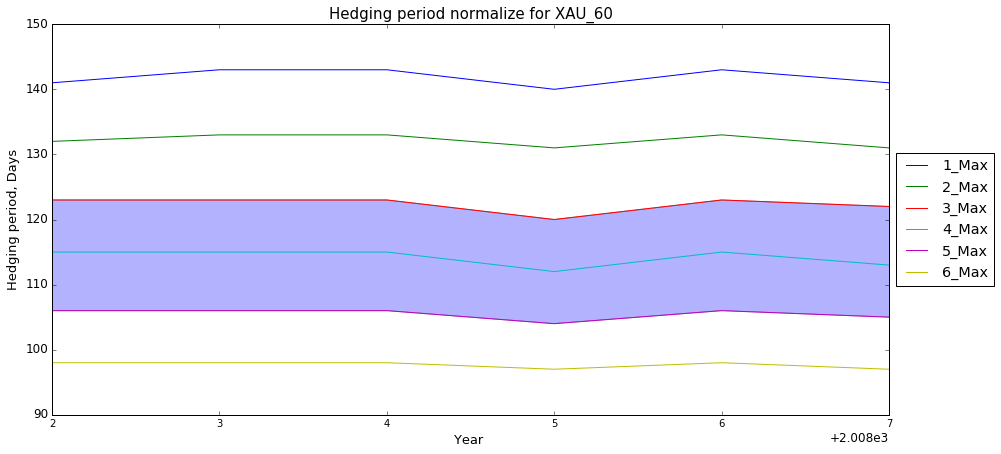

In [40]:
avg_group_count.iloc[:,1:7].plot(kind='line')
plt.ylabel('Hedging period, Days',fontsize=13)
plt.xlabel('Year ',fontsize=13)
mean_line=describe_count.iloc[1,4] # 4_Max mean
#plt.axhline(y=mean_line ,linewidth=4, color='grey') # задан средний размер
plt.fill_between(avg_group_count.index.values.tolist(),
                 avg_group_count.iloc[:,5].values.tolist(),avg_group_count.iloc[:,3].values.tolist(), facecolor='blue',alpha=0.30)
plt.title("Hedging period normalize for " + txtTiker,fontsize=15)
plt.xticks(avg_group_count.index.values.tolist(),fontsize=10) # иначе года показываются через один
plt.xlim(2010,2015) # 2004 и 2016 неполные года потому для них некорректно период хеджирования указывать
plt.ylim(90,150)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.savefig(path+'Hedge period NORM_'+txtTest+'.png');

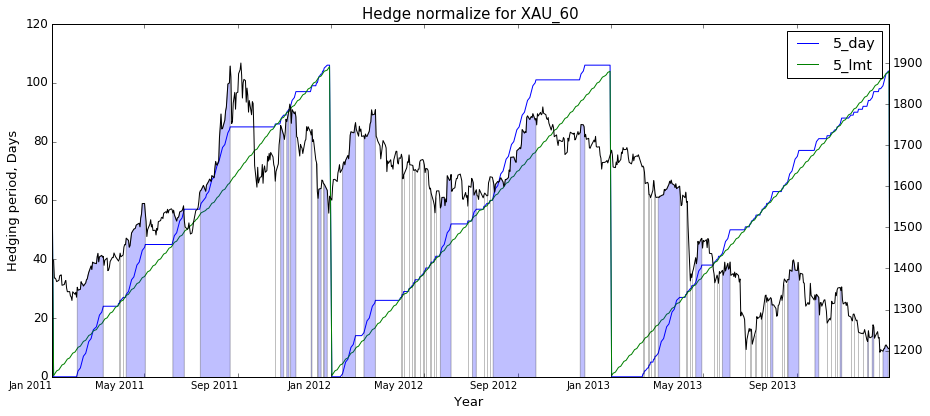

In [41]:
from dateutil.parser import parse
N_days=5
avg_df[[str(N_days)+'_day',str(N_days)+'_lmt']].plot(kind='line')
plt.ylabel('Hedging period, Days',fontsize=13)
plt.xlabel('Year ',fontsize=13)
plt.xticks(fontsize=10,rotation=0) # иначе года показываются через один
plt.title("Hedge normalize for " + txtTiker,fontsize=15)

plt.twinx()
StartData=parse('2011-01-01')
EndData=parse('2013-12-31')
MarketPrice_forGraf=avg_df['Close'][StartData:EndData]
Date_forGraf=MarketPrice_forGraf.index
Date_ind=avg_df.index.slice_locs(start=StartData, end=EndData)

plt.plot(MarketPrice_forGraf,"k-",linewidth=1,alpha=1)
plt.xlim(StartData,EndData); #'2016-06-15'
plt.ylim(0.95*min(MarketPrice_forGraf),1.05*max(MarketPrice_forGraf))
plt.fill_between(Date_forGraf,0, MarketPrice_forGraf, facecolor='blue',where=avg_df[str(N_days)+'_Max'][Date_ind[0]:Date_ind[1]]>0,alpha=0.25)
plt.savefig(path+'Hedge norm_'+txtTest+'.png');

In [52]:
#avg_df[avg_df['Year']==2007][50:260]